## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata , study_results,how='outer',on='Mouse ID')
combined_data_df.head(10)

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
print(combined_data_df['Mouse ID'].nunique())


249


In [5]:
len(combined_data_df[combined_data_df['Mouse ID']=='k403'])

10

In [6]:
combined_data_df[combined_data_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_mice_duplicate_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mice = combined_data_mice_duplicate_df['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_mice_duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe_mice =combined_data_df[(combined_data_df['Mouse ID']!= 'g989')]
clean_dataframe_mice.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe_mice.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_avg = clean_dataframe_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_dataframe_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_var = clean_dataframe_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_std = clean_dataframe_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_dataframe_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimen_summary_statistics_df = pd.DataFrame({'Average Tumor Volume':regimen_avg,
                                             'Tumor Volume Median':regimen_median,
                                             'Tumor Volume Variance':regimen_var,
                                             'Tumor Volume Standard Deviation':regimen_std,
                                             'Tumor Volume SEM':regimen_sem})

regimen_summary_statistics_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Average Tumor Volume,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single = ['mean','median','var','std','sem']
regimen_summary_single_df = pd.DataFrame(clean_dataframe_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':single}))

regimen_summary_single_df
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

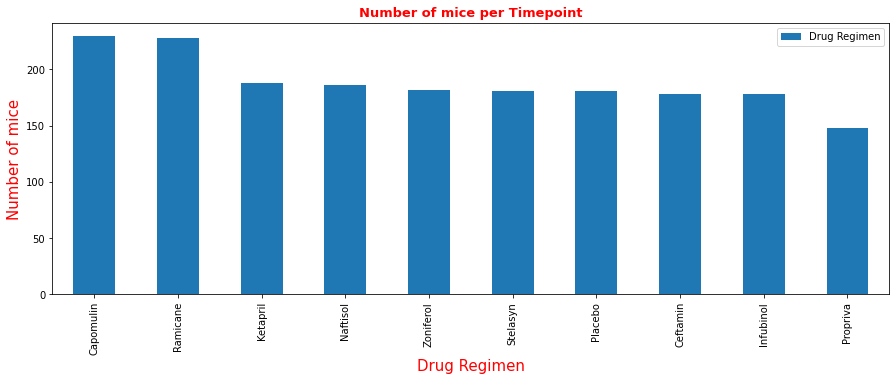

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_mice = clean_dataframe_mice['Drug Regimen'].value_counts()
number_of_mice.plot.bar(figsize=(15,5))
plt.xlabel('Drug Regimen',fontsize=15, color= 'red' )
plt.ylabel('Number of mice', fontsize=15, color='red')
plt.title('Number of mice per Timepoint', fontsize=13, fontweight = 'bold', color= 'red' )
plt.legend()
plt.savefig("../Images/Barplotpandas.png")
plt.show()


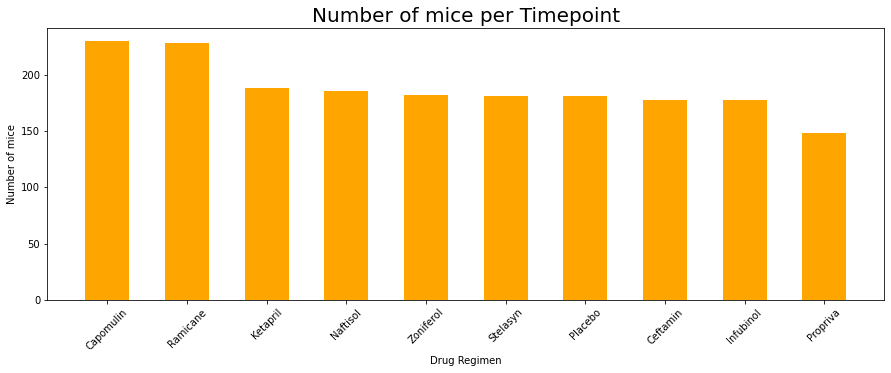

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize = (15,5))
plt.bar(number_of_mice.index.values,number_of_mice.values,color = 'orange',width = 0.55)
plt.xlabel('Drug Regimen',fontsize=10)
plt.ylabel('Number of mice',fontsize=10)
plt.title('Number of mice per Timepoint', fontsize=20)
plt.xticks(rotation=45)
plt.savefig("../Images/Barplotpyplot.png")
plt.show()


In [ ]:
# Observation 1: We can see that Capolumin and ramicane have higher mice per timepoint compared to the others , but otherwise most of the treatments have the same values. This can be due to lesser timepoints per mice or lesser mice in general.

In [16]:
clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

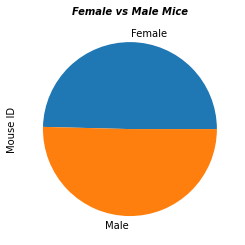

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_demo = clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()
gender_demo_df = pd.DataFrame(gender_demo)
plot = gender_demo_df.plot.pie(y="Mouse ID", legend= False)
plot.set_title("Female vs Male Mice", fontsize=10, fontweight = 'heavy', style= 'italic')
plt.savefig("../Images/Piechartpandas.png")
plt.show()


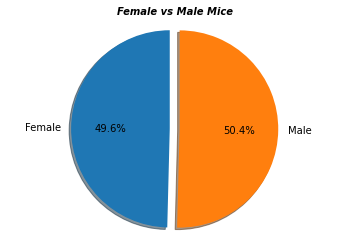

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = clean_dataframe_mice.groupby(['Sex'])['Mouse ID'].nunique()
gender_demographic = list(distribution.index)
explode = (0,0.1)
plt.pie(distribution,labels=gender_demographic,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis("equal")
plt.title("Female vs Male Mice",fontsize=10, fontweight = 'heavy', style= 'italic')
plt.savefig("../Images/Piechartplyplot.png")
plt.show()


In [ ]:
# Observation 2: Male and Female population seem to be pretty evenly distributed.

## Quartiles, Outliers and Boxplots

In [19]:
regimen_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimen_drug_list_df= pd.DataFrame({"Drug Regimen":regimen_drug_list})

In [20]:
regimen_drug_list_df

,Drug Regimen
0,Capomulin
1,Ramicane
2,Infubinol
3,Ceftamin


In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
final_tumorvolume = clean_dataframe_mice.groupby(['Mouse ID'])['Timepoint'].max()
final_tumorvolume = pd.DataFrame(final_tumorvolume)


final_tumorvolume_df = final_tumorvolume.merge(clean_dataframe_mice, how='left', on=['Mouse ID', 'Timepoint']) 
final_tumorvolume_df

regimen_drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimen_drug_list_df= pd.DataFrame({"Drug Regimen":regimen_drug_list})

upperbound =[]
lowerbound=[]
iqrs = []

for drugs in regimen_drug_list:
    selected_drug = final_tumorvolume_df.loc[final_tumorvolume_df['Drug Regimen']==drugs,'Tumor Volume (mm3)']
    
    quartiles = selected_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    
    upperbound.append(upper_bound)
    lowerbound.append(lower_bound)
    iqrs.append(iqr)

regimen_drug_list_df['Upper Bond']= upperbound
regimen_drug_list_df['Lower Bond']= lowerbound
regimen_drug_list_df['IQR']= iqrs

print(regimen_drug_list_df)

final_count= regimen_drug_list_df.merge(final_tumorvolume_df, how='left', on=['Drug Regimen'])

first = final_count.loc[final_count['Drug Regimen']=='Capomulin']
Capomulin_outliers = first[(first['Tumor Volume (mm3)'] < 20.7) |(first['Tumor Volume (mm3)'] > 51.8)]
second = final_count.loc[final_count['Drug Regimen']=='Ramicane']
Ramicane_outliers = first[(first['Tumor Volume (mm3)'] < 17.9) |(first['Tumor Volume (mm3)'] > 54.3)]
third = final_count.loc[final_count['Drug Regimen']=='Infubinol']
Infubinole_outliers = first[(first['Tumor Volume (mm3)'] < 36.8) |(first['Tumor Volume (mm3)'] > 82.7)]
fourth = final_count.loc[final_count['Drug Regimen']=='Ceftamin']
Ceftamin_outliers = first[(first['Tumor Volume (mm3)'] < 25.3) |(first['Tumor Volume (mm3)'] > 87.6)]

print("\n------------------------------")
print("Capomulin_outliers", len(Capomulin_outliers))
print("Ramicane_outliers", len(Ramicane_outliers))
print("Infubinole_outliers", len(Infubinole_outliers))    


print("Ceftamin_outliers", len(Ceftamin_outliers))




  Drug Regimen  Upper Bond  Lower Bond        IQR
0    Capomulin   51.832015   20.704562   7.781863
1     Ramicane   54.306811   17.912664   9.098537
2    Infubinol   82.741446   36.832905  11.477135
3     Ceftamin   87.666458   25.355450  15.577752

------------------------------
Capomulin_outliers 0
Ramicane_outliers 0
Infubinole_outliers 10
Ceftamin_outliers 1


In [ ]:
#Observation 3: As per the analysis, the top drug performers are - Capomulin, Ramicane,Infubinol,Ceftamin. Capomulin and Ramicane drugs shows the decrease in the tumor growth.
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

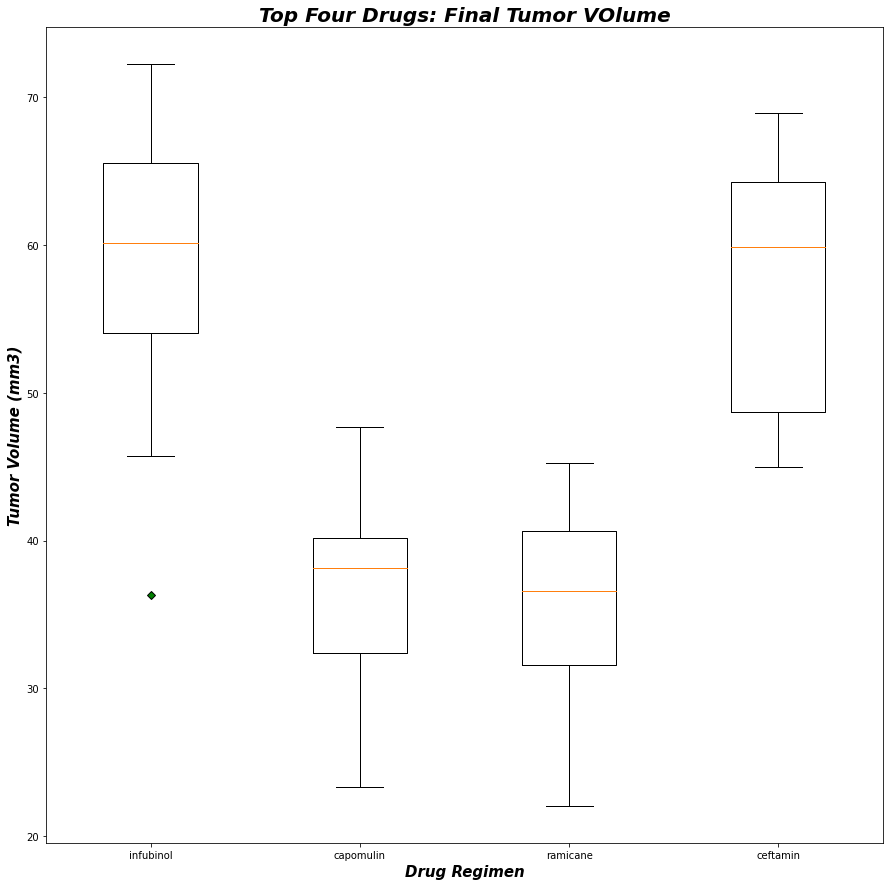

In [22]:
green_diamond = dict(markerfacecolor='g', marker='D')
final_count[final_count['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']

data_infubinol = final_count[final_count['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
data_capomulin = final_count[final_count['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
data_ramicane = final_count[final_count['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
data_ceftamin = final_count[final_count['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

data = [data_infubinol,data_capomulin,data_ramicane,data_ceftamin]
labels = ['infubinol','capomulin','ramicane','ceftamin']
fig1, ax1 = plt.subplots(figsize = (15,15))
ax1.set_title('Top Four Drugs: Final Tumor VOlume',fontsize=20, fontweight = 'heavy', style= 'italic' )
plt.xlabel('Drug Regimen',fontsize=15, fontweight = 'heavy', style= 'italic')
plt.ylabel('Tumor Volume (mm3)',fontsize=15, fontweight = 'heavy', style= 'italic')
ax1.boxplot(data,flierprops=green_diamond,labels=labels,whis = 1.5,manage_ticks = True)
plt.savefig("../Images/Boxplot.png")
plt.show()

In [ ]:
# Observation 4: From the above observation, we can draw a conclusion that Infubinol have the highest number of outliers

## Line and Scatter Plots

In [23]:

capo = clean_dataframe_mice[clean_dataframe_mice['Drug Regimen'] == 'Capomulin']
mouse_s185 = capo[capo['Mouse ID'] == 's185'][['Timepoint','Tumor Volume (mm3)']]

In [24]:
mouse_s185

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


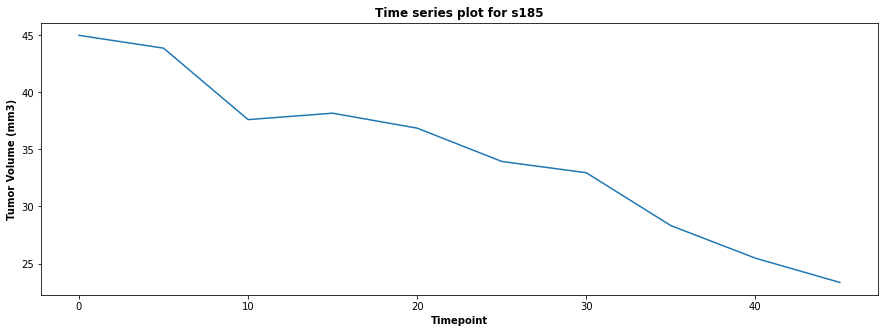

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure(figsize = (15,5))
plt.plot(mouse_s185['Timepoint'],mouse_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint',fontweight='bold')
plt.ylabel('Tumor Volume (mm3)',fontweight='bold')
plt.title('Time series plot for s185',fontsize=12,fontweight='bold',style='normal')
plt.savefig("../Images/Line.png")
plt.show()

In [ ]:
# Observation 4: From the above observation, we can draw a conclusion that Infubinol have the highest number of outliers

In [30]:
averages = capo.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
merged = pd.merge(left = capo,right = averages,how = 'left',on = 'Mouse ID')
values = merged.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)_y'].max()
values = values.reset_index()

In [31]:
values.head(10)

,Mouse ID,Weight (g),Tumor Volume (mm3)_y
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


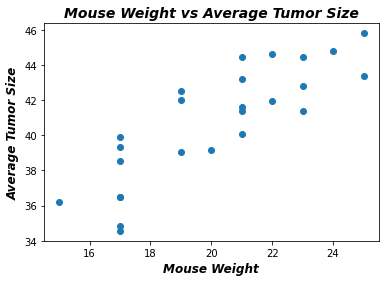

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_avg_tumor = clean_dataframe_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Capo_avg_tumor = Capo_avg_tumor .reset_index()
plt.scatter(values['Weight (g)'],values['Tumor Volume (mm3)_y'])
plt.xlabel('Mouse Weight',fontsize=12,fontweight='bold',style='oblique' )
plt.ylabel('Average Tumor Size',fontsize=12,fontweight='bold',style='oblique')
plt.title('Mouse Weight vs Average Tumor Size',fontsize=14,fontweight='bold',style='oblique')
plt.savefig("../Images/ScatterPlot.png")
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope,intercept,rvalue,pvalue,stderr =st.linregress(values['Weight (g)'],values['Tumor Volume (mm3)_y'])
x = values['Weight (g)']
y = values['Tumor Volume (mm3)_y']

In [34]:
print("Correlation coefficient is %f"%rvalue)

Correlation coefficient is 0.841936


In [35]:
regress_value = slope*x + intercept #for i in range(0,30)

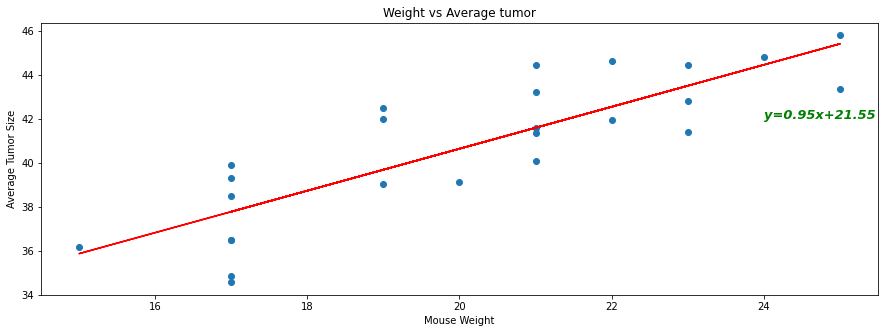

In [36]:
plt.figure(figsize =(15,5))
plt.plot(x,regress_value,"r-")
plt.scatter(values['Weight (g)'],values['Tumor Volume (mm3)_y'])
line_slope = 'y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.annotate(line_slope,(24,42), fontsize=13, color='green', fontweight='heavy', style='italic')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Size')
plt.title('Weight vs Average tumor')
plt.savefig("../Images/ScatterplotRegression.png")
plt.show()

In [ ]:
#observation 6: There seems to be some sort of correlation between Weight and average tumor for mice taking the drug Capomulin. We can expect the correlation coefficient to be close to 1